* # EN ESTE CASO VAMOS A HACER UN DETECTOR DE IMÁGENES PARA LAS FRUTAS, ES EL MISMO QUE USAMOS ANTERIORMENTE, VEREMOS SI SERVIRA ES UN DETECTOR DE IMÁGENES "GENERICO" PARA TODO TIPO DE RECONOMICIENTO E IDENTIFICACIÓN DE IMÁGENES. USAREMOS LAS MISMAS FUNCIONES. ARREGLANDO ALGUNAS QUE OTRAS LINEAS  Y AJUSTANDO ALGUNOS HIPERPARAMETROS (tanto de cargar , crear modelo y hacer un análisis exhaustivo)

In [7]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import random 
import matplotlib.pyplot as plt

* # Carga de datos no estructurados ( en este caso son imágenes de personas, animales y autos)
* Definimos las rutas de las carpetas.





In [8]:
root_folder = "/Users/Acer/Desktop/detector-cosas/"
training_folder = os.path.join(root_folder, "images-frutas" , "training")
testing_folder = os.path.join(root_folder,"images-frutas" , "testing")

In [9]:
#### Categorías y etiquetas
categories = ["bananas" , "frutillas" ,"naranjas","peras" , "uvas"]
num_classes = len(categories)

----
* # Hacemos un análisis sobre los datos no estructurados que tenemos, en este caso sobre imágenes de frutas.

In [10]:
main_folder = "/Users/Acer/Desktop/detector-cosas/images-frutas/"

In [13]:
def visualizar_imagenes_conteo(folder):
    fig = plt.figure(figsize=(12,6))
    
    for i , category in enumerate(categories):
        category_folder = os.path.join(folder, category)
        image_files = os.listdir(category_folder)
        num_images = len(image_files)
        
        ### Tomar imágenes aleatorias
        random_image_file = random.choice(image_files)
        image_path = os.path.join(category_folder, random_image_file)
        image = plt.imread(image_path)
        
        ### Mostramos la imágenes
        ax = fig.add_subplot(1,5, i+1)
        ax.imshow(image)
        ax.set_title(category)
        ax.axis('off')
        
        ### Cantidad de imagenes en cada carpeta
        ax.text(0.5, -0.1, f'{num_images} imágenes', transform=ax.transAxes, ha='center')
    plt.tight_layout()
    plt.show()

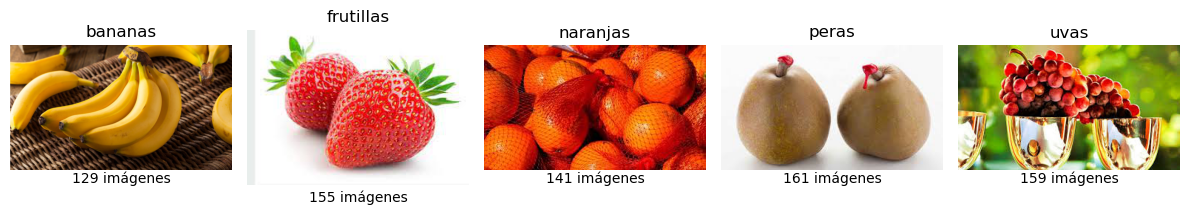

In [15]:
visualizar_imagenes_conteo(os.path.join(main_folder, 'training'))

* # Tenemos 5 carpetas con imágenes de frutas y distinto tamaños y tipo
-----

In [16]:
#### Creamos una función para cargar las imágenes de cada categoria y pasarla a Numpy array 

def load_images(folder):
    images = []
    labels = []
    
    for category in categories:
        category_folder = os.path.join(folder, category)
        for filename in os.listdir(category_folder):
            img_path = os.path.join(category_folder, filename)
            img = Image.open(img_path)
            img = img.resize((90,90)) # Redimension de las imáganes
            if img.mode != "RGB":
                img = img.convert("RGB")
                
            img_array = np.array(img)
            images.append(img_array)
            labels.append(categories.index(category))
    
    images = np.array(images)
    labels = np.array(labels)
    return images , labels

In [18]:
#### Cargamos los datos de entrenamiento y prueba
train_images , train_labels = load_images(training_folder)
test_images , test_labels = load_images(testing_folder)

C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [19]:
#### normalizamos los pixeles para tener los valores entre 0 y 1
train_images = train_images / 255.0
test_images = test_images / 255.0

----
* # Creamos el modelo de la red neuronal 

In [20]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(90, 90, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes)
])

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
model.fit(train_images, train_labels, epochs=10, batch_size=32)

Epoch 1/10
24/24 [==============================] - 5s 148ms/step - loss: 3.9283 - accuracy: 0.3141
Epoch 2/10
24/24 [==============================] - 4s 158ms/step - loss: 1.1287 - accuracy: 0.5651
Epoch 3/10
24/24 [==============================] - 4s 150ms/step - loss: 0.8853 - accuracy: 0.7168
Epoch 4/10
24/24 [==============================] - 4s 166ms/step - loss: 0.6772 - accuracy: 0.7973
Epoch 5/10
24/24 [==============================] - 4s 154ms/step - loss: 0.5656 - accuracy: 0.8389
Epoch 6/10
24/24 [==============================] - 4s 152ms/step - loss: 0.4318 - accuracy: 0.9114
Epoch 7/10
24/24 [==============================] - 4s 147ms/step - loss: 0.3428 - accuracy: 0.9128
Epoch 8/10
24/24 [==============================] - 4s 154ms/step - loss: 0.2972 - accuracy: 0.9221
Epoch 9/10
24/24 [==============================] - 4s 157ms/step - loss: 0.2263 - accuracy: 0.9396
Epoch 10/10
24/24 [==============================] - 4s 148ms/step - loss: 0.1729 - accuracy: 0.9678

* # El modelo por lo que se observa sigue siendo muy bueno, tiene una eficacia de %96.78
---

----
* # Visualizacion del comportamiento y eficacia del modelo


In [23]:
import random 
import matplotlib.pyplot as plt

In [24]:
#### creamos otra función para de paso poder usarla a futuro en otros trabajos de ciencia de datos e identificaciones de imágenes
def predict_and_visualize(model, images, labels):
    fig = plt.figure(figsize=(12,8))
    
    for i in range(30):
        index = random.randint(0,len(images) - 1)
        image = images[index]
        label = labels[index]
        
        prediction = model.predict(np.expand_dims(image,axis=0))
        predicted_label = np.argmax(prediction)
        
        ax = fig.add_subplot(5 , 6 , i+1)
        ax.imshow(image)
        
        if predicted_label == label: 
            ax.set_title(categories[predicted_label] , color="green")
        else:
            ax.set_title(categories[predicted_label] , color="red")
        ax.axis("off")
        
    plt.tight_layout()
    plt.show()

1/1 [==============================] - 0s 16ms/step


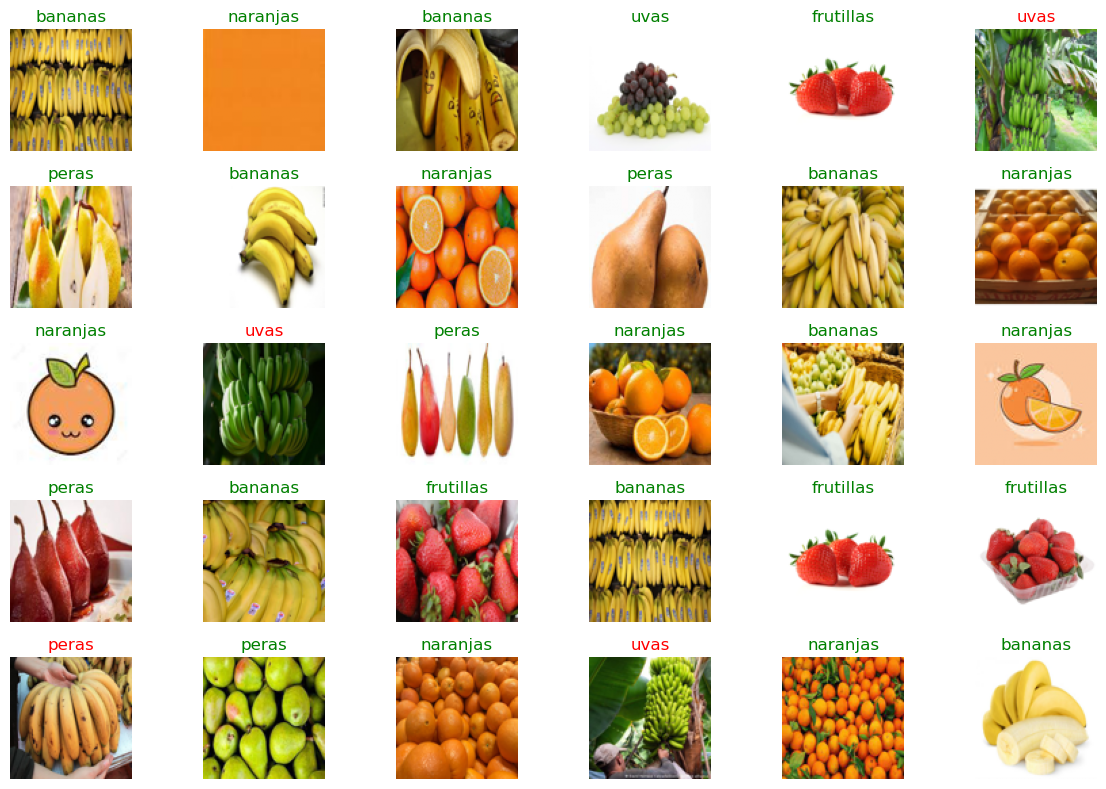

In [25]:
predict_and_visualize(model , test_images ,test_labels)

* # Aca se puede ver que de las 30 imágenes elegidas aleatoriamente 4 predijo erroneamente. Es decir 26 imágenes fueron acertadas y otras 4 no.

* ### a simple vista se puede decir que los errores fueron por el tema de "color" y calidad de "imágen"
---

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
#### Realizar predicciones en el conjunto de imágenes de prueba
predictions = model.predict(train_images)
predicted_labels = np.argmax(predictions, axis=1)

24/24 [==============================] - 1s 45ms/step


In [28]:
accuracy = accuracy_score(train_labels, predicted_labels)
print("Precisión del modelo: {:.2%}".format(accuracy))

Precisión del modelo: 98.26%


* # Tenemos una predicción casi perfecta, con una eficacia del %98.26 . Es un muy buen modelo para predecir
----

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [30]:
### Calculamos la matriz de confusión
confusion = confusion_matrix(train_labels , predicted_labels)

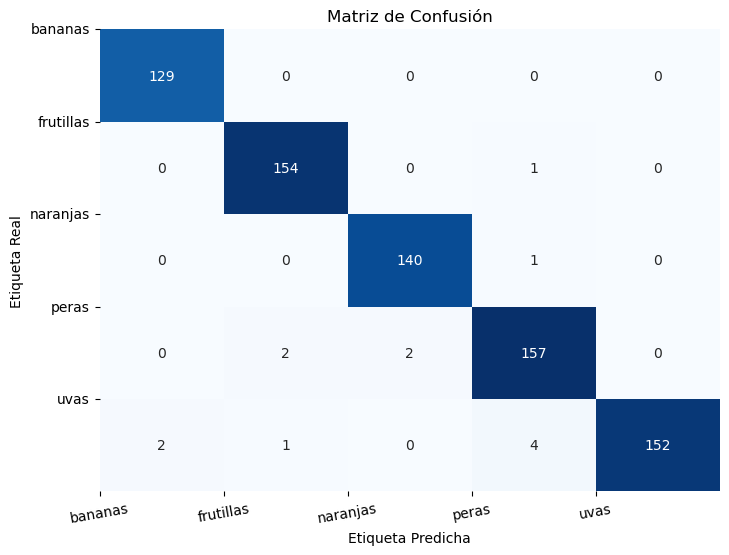

In [31]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion ,annot=True , fmt="d", cmap="Blues" , cbar=False)
plt.title("Matriz de Confusión")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.xticks(np.arange(num_classes), categories, rotation=10)
plt.yticks(np.arange(num_classes), categories , rotation=0)
plt.show()

* # Aca vemos que el modelo casi no tiene errores de todas las "IMÁGENES" a clasificar solamente clasifico mal muy pocas

* # de todas las imágenes que tenemos (745) clasifico solamente 13 imágenes. Es un modelo muy bueno
----

* # RESUMEN:
    * # El modelo es muy bueno, tenemos una eficacia del %98,26 en general. en el anterior modelo que creamos teniamos una eficacia del %99 (cuando clasificamos "autos , personas , perros y gatos")

----
* # La red neuronal convolucional fue creada con la librearia de "TensorFlow" usando el interfaz de"Keras" para construir y entrenar el dicho modelo. Apliquie tecnicas de preprocesamiento de imágenes y redimension y normalize los pixeles para preparar los datos de entrenamiento y prueba. La red esta compuesta por capas de tipo "densa" y con una activasión de forma "Relu". 